In [3]:
pip install termcolor

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=274af8941db3dd27d91c75546257d4611ac11df0b6ba8b82b96467958a4f2192
  Stored in directory: c:\users\alokj\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from termcolor import colored
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [51]:
import os
import glob

In [52]:
glob.glob('./*.csv')

['.\\browsing.csv',
 '.\\climbing.csv',
 '.\\running.csv',
 '.\\Travelling.csv',
 '.\\walking.csv']

In [53]:
output_label = {
 './Travelling.csv' : 'travel',
 './climbing.csv' : 'climb',
 './walking.csv' : 'walk',
 './running.csv' : 'run',
 './browsing.csv' : 'browse'
}

In [54]:
dataset_train = {
    'time' : [], 
    'gFx' : [], 
    'gFy' : [], 
    'gFz' : [], 
    'TgF' : [],
    'class' : []
}

dataset_test = {
    'time' : [], 
    'gFx' : [], 
    'gFy' : [], 
    'gFz' : [], 
    'TgF' : [], 
    'class' : []
}

for name in output_label.keys():
    df = pd.read_csv(name)
    
    flag = 0
    if name != './walking.csv' :
        for i in range(0,301, 10):
            flag+=1
            for key in dataset_train.keys():
                if key != 'class' :
                    if flag <= 25 :
                        dataset_train[key].append(df[df.time.between(i, i+10.0)][key].mean())
                    else:
                        dataset_test[key].append(df[df.time.between(i, i+10.0)][key].mean())
                else:
                    if flag <= 25 :
                        dataset_train[key].append(output_label[name])
                    else:
                        dataset_test[key].append(output_label[name])
    else:
        for i in range(0,70, 10):
            flag+=1
            for key in dataset_train.keys():
                if key != 'class' :
                    if flag <= 4 :
                        dataset_train[key].append(df[df.time.between(i, i+10.0)][key].mean())
                    else:
                        dataset_test[key].append(df[df.time.between(i, i+10.0)][key].mean())
                else:
                    if flag <= 4 :
                        dataset_train[key].append(output_label[name])
                    else:
                        dataset_test[key].append(output_label[name])
            
    print(name)
    print('='*50)

./Travelling.csv
./climbing.csv
./walking.csv
./running.csv
./browsing.csv


## Visualization of Data

In [55]:
data_train = pd.DataFrame(dataset_train)
data_test = pd.DataFrame(dataset_test)

data = pd.concat([data_train, data_test])



In [81]:
activities = [
    'travel',
    'climb',
     #'walk'
    'run',
    'browse'
    ]

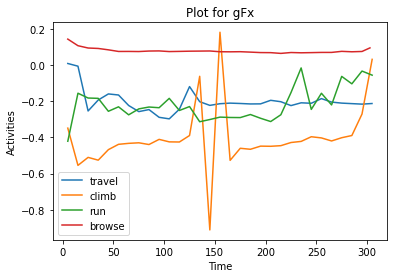

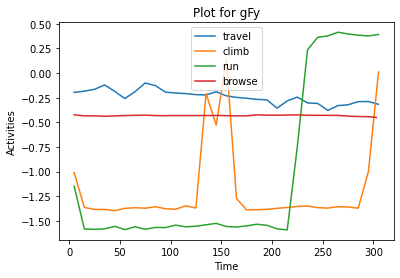

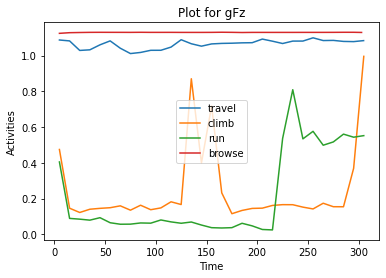

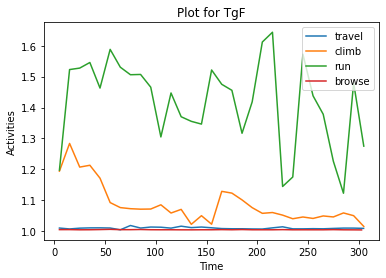

In [83]:
    
for feature in ['gFx','gFy', 'gFz','TgF' ]: 
    for act in activities:
        plt.plot(data[data['class'] == act]["time"], data[data['class'] == act][feature], label = act)
        plt.legend()
        
    plt.title("Plot for {}".format(feature))
    plt.xlabel('Time')
    plt.ylabel('Activities')
    plt.show()
    print(colored("="*50, 'green'))

In [84]:
activities = [
    #'travel',
    #'climb',
    'walk'
    #'run',
    #'browse'
    ]

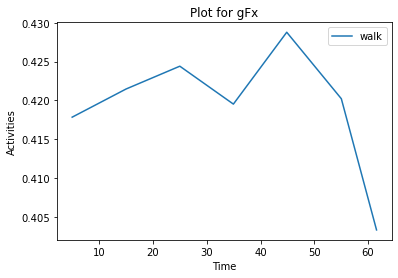

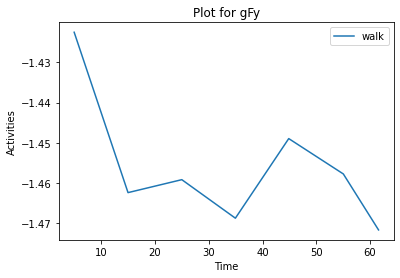

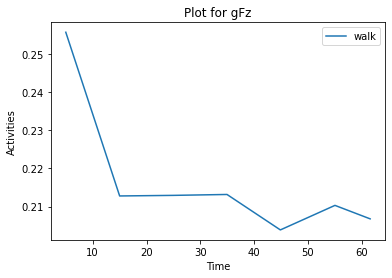

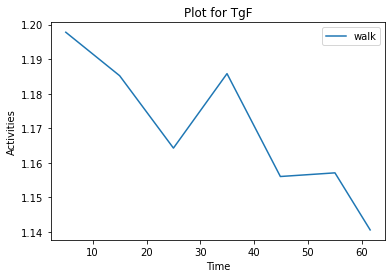

In [89]:


for feature in ['gFx','gFy', 'gFz','TgF' ]: 
    
    for act in activities:
        plt.plot(data[data['class'] == act]["time"], data[data['class'] == act][feature], label = act)
        plt.legend()
        
    plt.title("Plot for {}".format(feature))
    plt.xlabel('Time')
    plt.ylabel('Activities')
    plt.show()
    print(colored("="*50, 'green'))

### Feature Selection

#### features experimented with:

Mean

Standard Deviation

Skewness

#### specific transformation:

for travelling and runnig fourier transform is needed (to transform G-force) and the mean is sufficient for the remaining activities.

## Dataset Preparation for ML models

In [58]:
df_train = pd.DataFrame(dataset_train)[['gFx','gFy','gFz','TgF','class']]

In [59]:
df_test = pd.DataFrame(dataset_test)[['gFx','gFy','gFz','TgF','class']]

In [100]:
# scaler to normalize the input values

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(df_train[['gFx','gFy','gFz','TgF']])

# FFT-Transform:
from scipy import fftpack
X_fft = fftpack.fft(df_train[['gFx','gFy','gFz','TgF']]) 


#label encoder 
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(df_train['class'].values)
y_train = label_encoder.transform(df_train['class'].values)


## get the test set

X_test = min_max_scaler.transform(df_test[['gFx','gFy','gFz','TgF']])
y_test = label_encoder.transform(df_test['class'].values)

### Decision Tree 

In [101]:
from sklearn import tree

In [102]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)


[Text(251.10000000000002, 205.35999999999999, 'X[2] <= 0.98\ngini = 0.767\nsamples = 104\nvalue = [25, 25, 25, 25, 4]'),
 Text(209.25, 181.2, 'X[2] <= 0.828\ngini = 0.697\nsamples = 79\nvalue = [0, 25, 25, 25, 4]'),
 Text(167.4, 157.04, 'X[3] <= 0.454\ngini = 0.566\nsamples = 54\nvalue = [0, 25, 25, 0, 4]'),
 Text(125.55000000000001, 132.88, 'X[0] <= 0.906\ngini = 0.365\nsamples = 32\nvalue = [0, 25, 3, 0, 4]'),
 Text(83.7, 108.72, 'X[2] <= 0.341\ngini = 0.191\nsamples = 28\nvalue = [0, 25, 3, 0, 0]'),
 Text(41.85, 84.56, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0, 0, 0]'),
 Text(125.55000000000001, 84.56, 'X[3] <= 0.124\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3, 0, 0]'),
 Text(83.7, 60.400000000000006, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]'),
 Text(167.4, 60.400000000000006, 'X[1] <= 0.366\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0, 0]'),
 Text(125.55000000000001, 36.24000000000001, 'X[1] <= 0.262\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0]'),
 Text(83.7, 12.

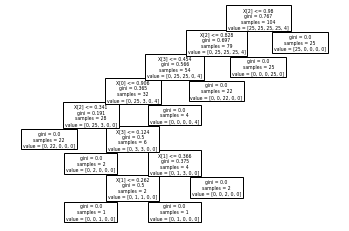

In [103]:
tree.plot_tree(clf) 

In [104]:
dt_predicted = clf.predict(X_test)
dt_predicted

array([3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0])

In [105]:
y_test

array([3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0])

### SVM Classifier

In [66]:
from sklearn import svm

In [67]:
clf_svm = svm.SVC()

In [68]:
clf_svm.fit(X_train, y_train)

SVC()

In [69]:
svm_predicted = clf_svm.predict(X_test)

### Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [72]:
lr_predicted = clf.predict(X_test)

### KNN 

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [92]:
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
knn_predicted = neigh.predict(X_test)

### Performance Analysis

In [94]:
matrix = pd.DataFrame({
    "Decision_Tree" : label_encoder.inverse_transform(dt_predicted),
    "SVM" : label_encoder.inverse_transform(svm_predicted),
    "Logistic_Regression" : label_encoder.inverse_transform(lr_predicted),
    "KNN" : label_encoder.inverse_transform(knn_predicted),
    "y_test" : label_encoder.inverse_transform(y_test)
})

In [95]:
matrix.head()

,Decision_Tree,SVM,Logistic_Regression,KNN,y_test
0,travel,travel,travel,travel,travel
1,travel,travel,travel,travel,travel
2,travel,travel,travel,travel,travel
3,travel,travel,travel,travel,travel
4,travel,travel,travel,travel,travel


### As we can see below: "Decision Tree" and "SVM" performs better than that of KNN and Logistic Regression for the give classification problem. 

In [96]:
matrix

,Decision_Tree,SVM,Logistic_Regression,KNN,y_test
0,travel,travel,travel,travel,travel
1,travel,travel,travel,travel,travel
2,travel,travel,travel,travel,travel
3,travel,travel,travel,travel,travel
4,travel,travel,travel,travel,travel
5,travel,travel,travel,travel,travel
6,climb,climb,climb,climb,climb
7,climb,climb,climb,climb,climb
8,climb,climb,climb,climb,climb
9,climb,climb,climb,climb,climb


In [97]:
for model in ["Decision_Tree","SVM","Logistic_Regression","KNN"] :
    print(colored("For Model : {} , Classification Report is : ".format(model),'magenta'))
    print(classification_report(matrix["y_test"].values, matrix[model].values))
    print('='*50)

For Model : Decision_Tree , Classification Report is : 
              precision    recall  f1-score   support

      browse       1.00      1.00      1.00         6
       climb       1.00      0.83      0.91         6
         run       1.00      1.00      1.00         6
      travel       0.86      1.00      0.92         6
        walk       1.00      1.00      1.00         3

    accuracy                           0.96        27
   macro avg       0.97      0.97      0.97        27
weighted avg       0.97      0.96      0.96        27

For Model : SVM , Classification Report is : 
              precision    recall  f1-score   support

      browse       1.00      1.00      1.00         6
       climb       0.83      0.83      0.83         6
         run       1.00      0.83      0.91         6
      travel       0.86      1.00      0.92         6
        walk       1.00      1.00      1.00         3

    accuracy                           0.93        27
   macro avg       0.94      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Analysis of Algorithms